Business Understanding:

Pneumonia is a leading cause of death worldwide, and early detection is crucial for effective treatment. Manual interpretation of chest X-ray images by radiologists is time-consuming and prone to human error, leading to delayed diagnosis and treatment.
Ojective: Develop a deep learning model to automate the process of pneumonia detection from chest X-ray images, enabling faster and more accurate diagnosis.

Data Understanding:

Collect a large dataset of labeled chest X-ray images, including both pneumonia-positive and pneumonia-negative cases.
Perform data exploration: Understand the characteristics of the data, identify any data quality issues, and explore potential patterns or features that can aid in pneumonia detection.

Data Preparation:

Data cleaning: Address any missing values, outliers, or inconsistencies in the dataset.
Feature engineering: Extract meaningful features from the chest X-ray images that can contribute to pneumonia detection, such as texture patterns or lung region segmentation.
Data transformation: Normalize or standardize the data as required for the deep learning model.

Modeling:
deep learning architecture for pneumonia detection, such as Convolutional Neural Networks (CNNs).
Train the model using the prepared dataset, optimizing the model's parameters and hyperparameters.
Validate and evaluate the model's performance using appropriate evaluation metrics, such as accuracy, sensitivity, specificity, or area under the receiver operating characteristic curve (AUC-ROC).

Evaluation:

Assess the model's performance against the project objectives, considering factors like accuracy, speed, and interpretability.
Identify any limitations or areas for improvement in the model's performance.
Iterate on the modeling process if necessary, by refining the architecture, adjusting hyperparameters, or gathering additional data.
Deployment:

Integrate the trained model into a software or web-based application that can accept chest X-ray images as input and provide automated pneumonia detection.
Test the deployed system thoroughly to ensure its functionality, reliability, and accuracy.
Monitor the system's performance in real-world scenarios and make necessary updates or improvements as needed.
Maintenance:

Continuously monitor and evaluate the system's performance, incorporating feedback from radiologists and healthcare professionals.
Update the model periodically to account for new data, evolving medical guidelines, or advancements in deep learning techniques.

In [1]:
import numpy as np                 # For numerical computations
import pandas as pd                # For data manipulation and analysis
import matplotlib.pyplot as plt    # For data visualization
import seaborn as sns              # For enhanced data visualization

import tensorflow as tf            # Deep learning framework
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [7]:
!ls


kaggle.json  sample_data


In [9]:
!kaggle datasets download -d your_dataset_name

403 - Forbidden


In [10]:
!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


In [12]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


100% 2.29G/2.29G [00:26<00:00, 149MB/s]
100% 2.29G/2.29G [00:26<00:00, 91.4MB/s]


In [13]:
!unzip chest-xray-pneumonia.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [15]:

!unzip chest-xray-pneumonia.zip
[n]o,


Archive:  chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:

import zipfile

# Specify the path to the zip file
zip_file_path = 'chest-xray-pneumonia.zip'

# Specify the directory to extract the contents to
extract_dir = 'path_to_extract_directory'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [26]:


import zipfile
import os
import pandas as pd

# Specify the path to the zip file
zip_file_path = 'chest-xray-pneumonia.zip'

# Specify the directory to extract the contents to
extract_dir = 'path_to_extract_directory'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Iterate over the extracted files
for file_name in os.listdir(extract_dir):
    file_path = os.path.join(extract_dir, file_name)
    
    if file_name.endswith('.csv'):
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Process the CSV file as needed
        # ...
        
        # Specify the path to save the individual CSV file
        csv_file_path = os.path.join(extract_dir, f"{file_name}.csv")
        
        # Save the processed CSV file
        df.to_csv(csv_file_path, index=False)


In [31]:

import os

# Get the current working directory
current_dir = os.getcwd()
print(current_dir)


/content


In [32]:
csv_file_path = 'path/to/chest-xray-pneumonia.csv'


In [39]:


import subprocess

# Change the permissions on the file
subprocess.run(["chmod", "u+r", "/data/chest-xray-pneumonia.zip"])




CompletedProcess(args=['chmod', 'u+r', '/data/chest-xray-pneumonia.zip'], returncode=1)

In [45]:

import os

# Specify the directory path
data_directory = '/content/chest_xray'

# List files in the train directory
train_directory = os.path.join(data_directory, 'train')
train_files = os.listdir(train_directory)
print("Train files:")
print(train_files)

# List files in the test directory
test_directory = os.path.join(data_directory, 'test')
test_files = os.listdir(test_directory)
print("Test files:")
print(test_files)

# List files in the validation directory
val_directory = os.path.join(data_directory, 'val')
val_files = os.listdir(val_directory)
print("Validation files:")
print(val_files)



Train files:
['PNEUMONIA', 'NORMAL']
Test files:
['PNEUMONIA', 'NORMAL']
Validation files:
['PNEUMONIA', 'NORMAL']


In [51]:

import cv2
import os
import numpy as np

# Specify the directory path
data_directory = '/content/chest_xray'

# List files in the train directory
train_directory = os.path.join(data_directory, 'train')
train_files = os.listdir(train_directory)

# Preprocess the images
preprocessed_images = []
for file_name in train_files:
    file_path = os.path.join(train_directory, file_name)
    
    # Check if the file is an image
    if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    
    # Load the image
    image = cv2.imread(file_path)
    
    # Check if the image was loaded successfully
    if image is None:
        continue
    
    # Resize the image
    image = cv2.resize(image, (224, 224))
    
    # Convert to grayscale (optional)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values to [0, 1]
    image = image / 255.0
    
    preprocessed_images.append(image)

# Convert the preprocessed images list to a NumPy array
preprocessed_images = np.array(preprocessed_images)

# Check the shape of the preprocessed images array
print("Preprocessed images shape:", preprocessed_images.shape)


Preprocessed images shape: (0,)


In [57]:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Set the paths to the data directories
data_directory = '/content/chest_xray'
train_directory = os.path.join(data_directory, 'train')
test_directory = os.path.join(data_directory, 'test')
val_directory = os.path.join(data_directory, 'val')

# Define a function to preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    return image

# Preprocess the train images and collect the labels
train_images = []
train_labels = []

for class_name in os.listdir(train_directory):
    class_dir = os.path.join(train_directory, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = preprocess_image(image_path)
        train_images.append(image)
        train_labels.append(class_name)

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (3337, 224, 224)
Train labels shape: (3337,)
Validation images shape: (835, 224, 224)
Validation labels shape: (835,)
Test images shape: (1044, 224, 224)
Test labels shape: (1044,)


In [77]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the labels and transform them
encoded_labels = label_encoder.fit_transform(labels)

# Print the encoded labels
print(encoded_labels)


[1 2 0]


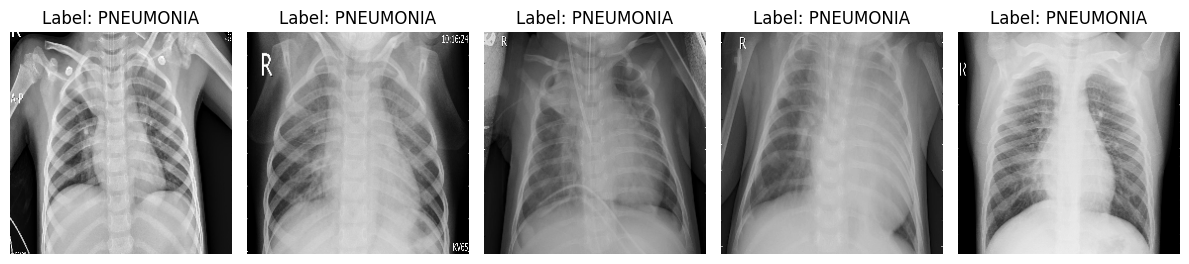

In [65]:

import matplotlib.pyplot as plt

# Visualize a few images from the train set
num_images = 5

plt.figure(figsize=(12, 8))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


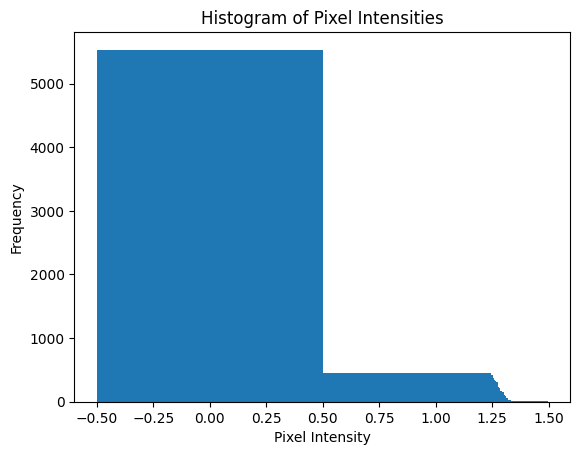

In [66]:

import numpy as np
import matplotlib.pyplot as plt

# Flatten the image
flattened_image = image.flatten()

# Calculate the histogram
hist_values, bin_edges = np.histogram(flattened_image, bins=256)

# Plot the histogram
plt.bar(bin_edges[:-1], hist_values, width=1)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()


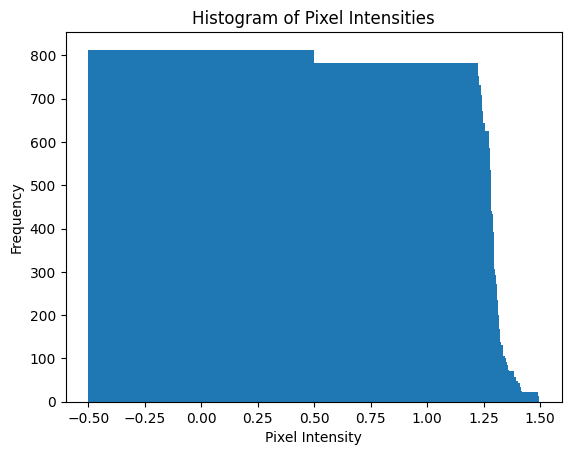

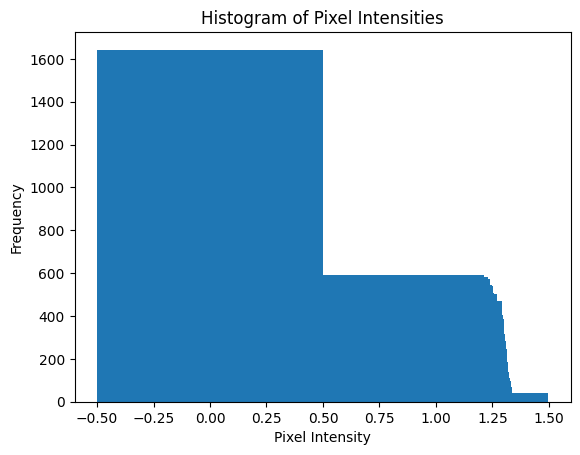

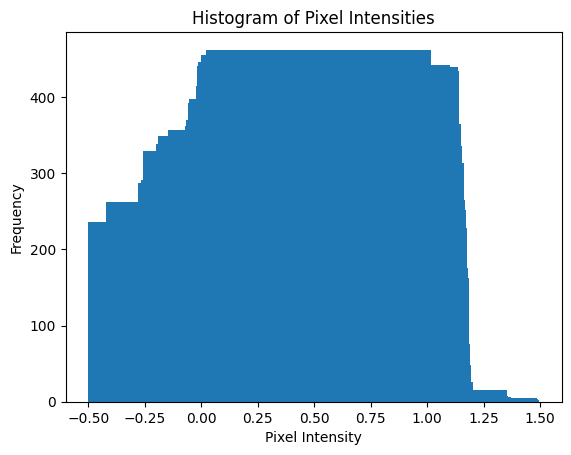

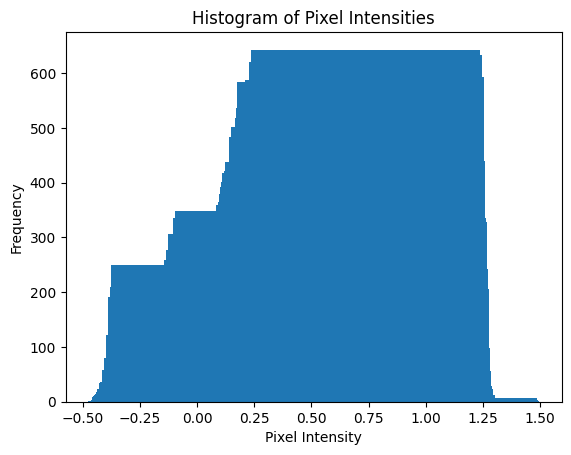

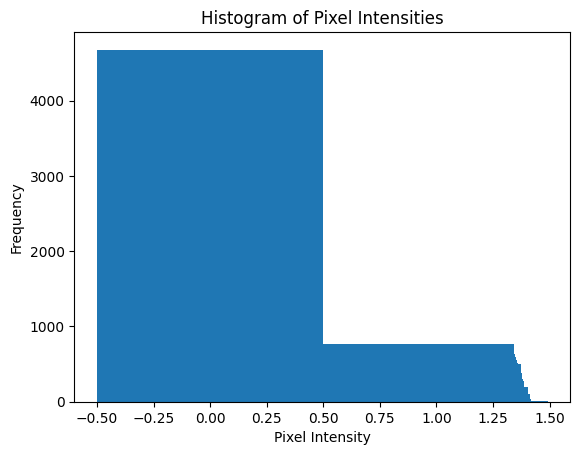

In [70]:

import numpy as np
import matplotlib.pyplot as plt

# Select a subset of images for visualization
selected_images = train_images[:5]  # Change the index range as needed

# Iterate over the selected images
for image in selected_images:
    # Flatten the image
    flattened_image = image.flatten()

    # Calculate the histogram
    hist_values, bin_edges = np.histogram(flattened_image, bins=256)

    # Plot the histogram
    plt.bar(bin_edges[:-1], hist_values, width=1)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pixel Intensities')
    plt.show()


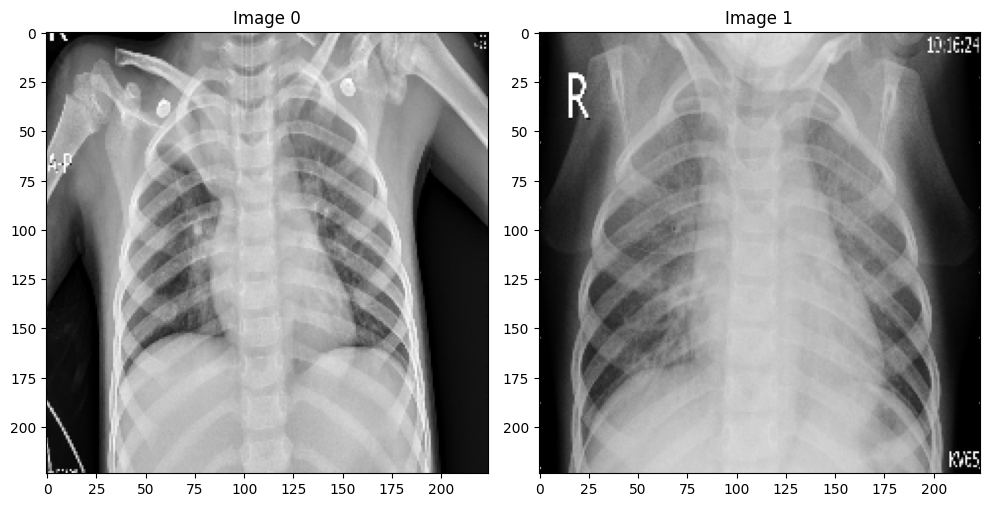

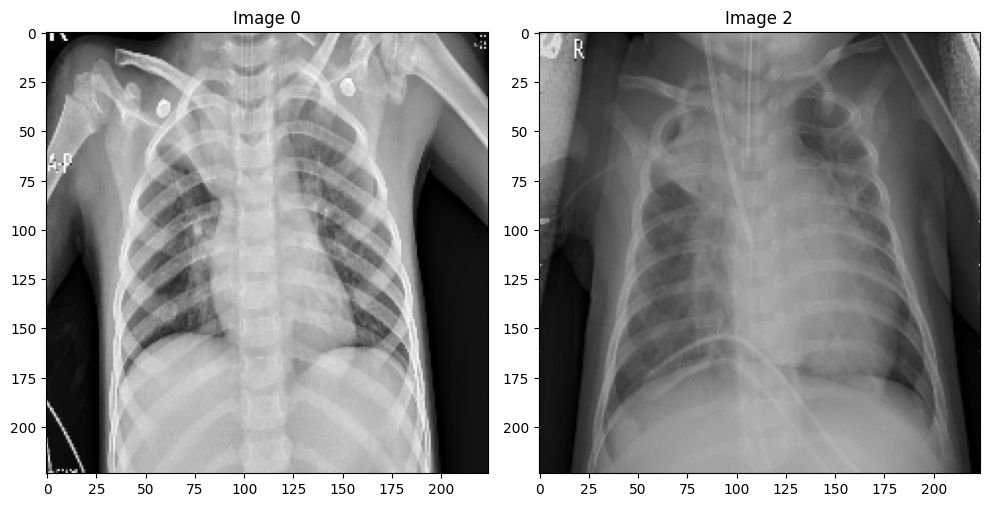

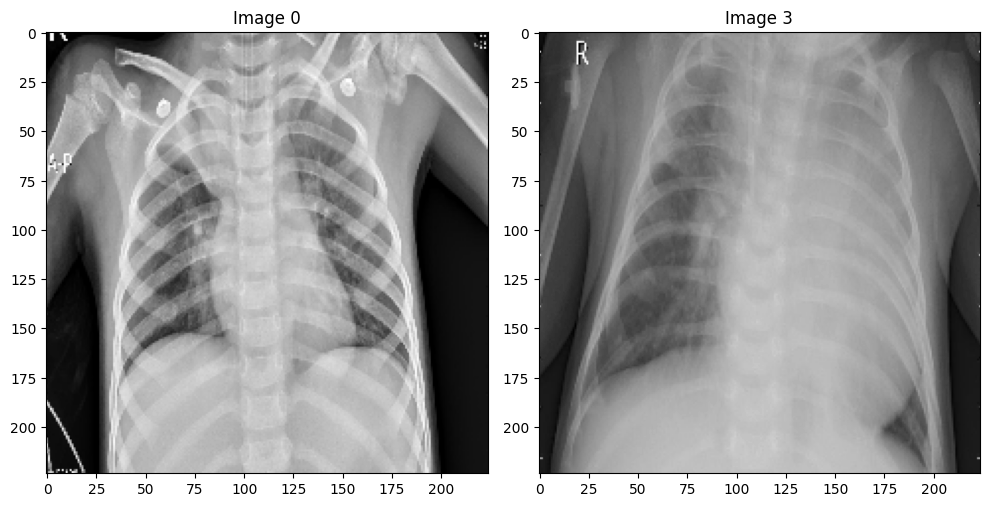

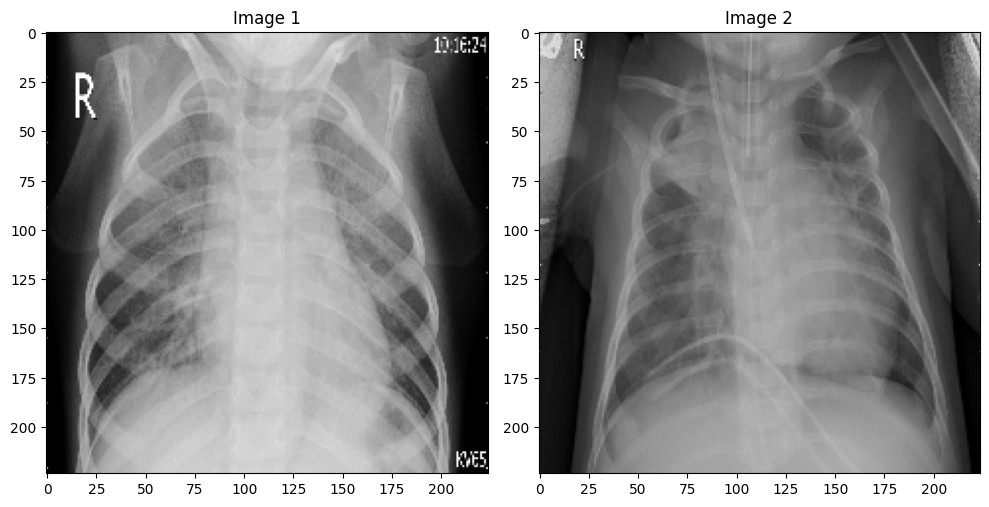

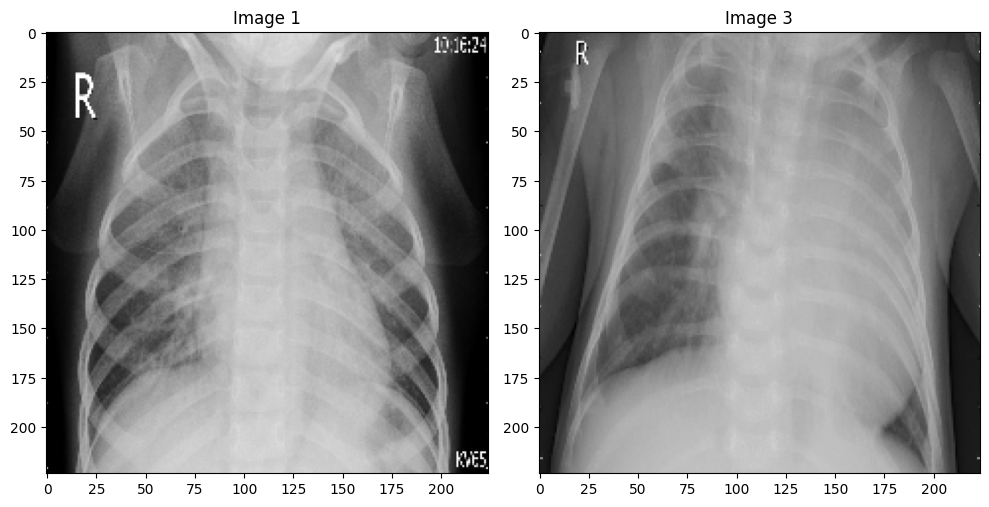

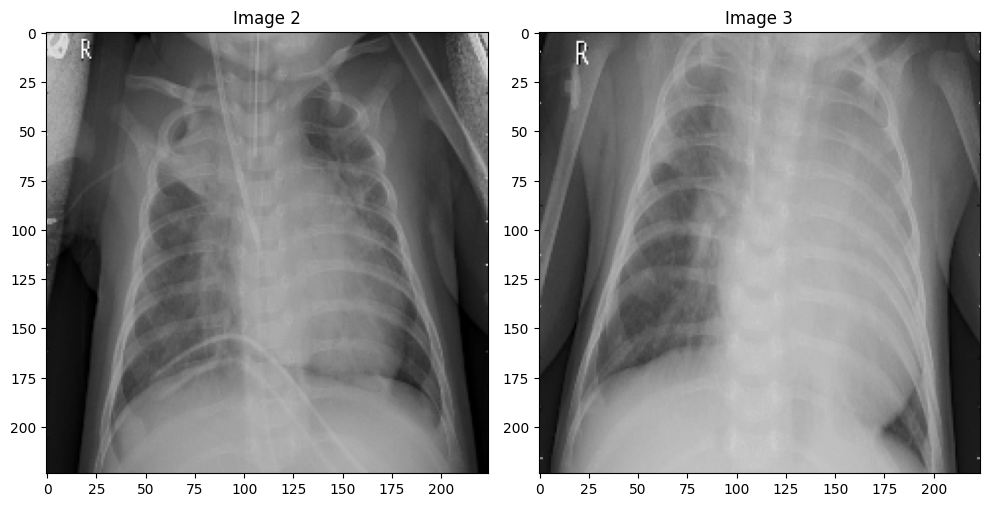

In [71]:
import matplotlib.pyplot as plt

# Select a subset of images for pairwise visualization
selected_images = train_images[:4]  # Change the number of images as needed

# Iterate over pairwise combinations
for i in range(len(selected_images)):
    for j in range(i + 1, len(selected_images)):
        # Create a figure with two subplots
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # Plot the first image
        axs[0].imshow(selected_images[i], cmap='gray')
        axs[0].set_title('Image {}'.format(i))

        # Plot the second image
        axs[1].imshow(selected_images[j], cmap='gray')
        axs[1].set_title('Image {}'.format(j))

        # Adjust spacing and display the plot
        plt.tight_layout()
        plt.show()


In [82]:


import os
import cv2

train_directory = '/content/chest_xray/train'

# Iterate over the files in the train directory
for file in os.listdir(train_directory):
    # Create the file path
    image_path = os.path.join(train_directory, file)
    
    # Read the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is not None:
        # Print the shape of the image
        print(f"Image shape: {image.shape}")
    else:
        # Print an error message
        print(f"Failed to load image: {file}")


Failed to load image: PNEUMONIA
Failed to load image: NORMAL


In [83]:
import cv2
import os

# Specify the directory path
data_directory = '/content/chest_xray'

# List files in the train directory
train_directory = os.path.join(data_directory, 'train')
train_files = os.listdir(train_directory)
print("Train files:")
print(train_files)

# Load and preprocess the images
train_images = []
train_labels = []
for file in train_files:
    try:
        # Load the image
        image_path = os.path.join(train_directory, file)
        image = cv2.imread(image_path)
        if image is not None:
            # Preprocess the image (resize, convert to grayscale, etc.)
            image = cv2.resize(image, (224, 224))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = image / 255.0

            # Append the preprocessed image and label to the lists
            train_images.append(image)
            train_labels.append(file.split('_')[0])
        else:
            print("Failed to load image:", file)
    except Exception as e:
        print("Failed to load image:", file)
        print("Error:", str(e))

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Print the shape of the loaded images and labels
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)


Train files:
['PNEUMONIA', 'NORMAL']
Failed to load image: PNEUMONIA
Failed to load image: NORMAL
Train images shape: (0,)
Train labels shape: (0,)


In [84]:
import cv2
import os
import numpy as np

# Specify the directory path
data_directory = '/content/chest_xray'

# List files in the train directory
train_directory = os.path.join(data_directory, 'train')
class_names = os.listdir(train_directory)
print("Class names:")
print(class_names)

# Load and preprocess the images
train_images = []
train_labels = []
for class_name in class_names:
    class_directory = os.path.join(train_directory, class_name)
    files = os.listdir(class_directory)
    for file in files:
        try:
            # Load the image
            image_path = os.path.join(class_directory, file)
            image = cv2.imread(image_path)
            if image is not None:
                # Preprocess the image (resize, convert to grayscale, etc.)
                image = cv2.resize(image, (224, 224))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image = image / 255.0

                # Append the preprocessed image and label to the lists
                train_images.append(image)
                train_labels.append(class_name)
            else:
                print("Failed to load image:", file)
        except Exception as e:
            print("Failed to load image:", file)
            print("Error:", str(e))

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Print the shape of the loaded images and labels
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)


Class names:
['PNEUMONIA', 'NORMAL']
Train images shape: (5216, 224, 224)
Train labels shape: (5216,)


In [92]:

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Path to the directory containing the chest x-ray images
data_dir = 'chest-xray-pneumonia'

# Read the CSV file containing the image labels
csv_file_path = os.path.join(data_dir, 'chest-xray-pneumonia.csv')
df = pd.read_csv(csv_file_path)

# Display the summary statistics
print(df.describe())

# Split the data into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Check the shape of the train, validation, and test sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

# Path to the train, validation, and test directories
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Load the train images and labels
train_images = []
train_labels = []

for index, row in train_df.iterrows():
    image_path = os.path.join(train_dir, row['filename'])
    try:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        train_images.append(image)
        train_labels.append(row['label'])
    except Exception as e:
        print(f"Failed to load image: {image_path}")

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Load the validation images and labels
val_images = []
val_labels = []

for index, row in val_df.iterrows():
    image_path = os.path.join(val_dir, row['filename'])
    try:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        val_images.append(image)
        val_labels.append(row['label'])
    except Exception as e:
        print(f"Failed to load image: {image_path}")

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Load the test images and labels
test_images = []
test_labels = []

for index, row in test_df.iterrows():
    image_path = os.path.join(test_dir, row['filename'])
    try:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        test_images.append(image)
        test_labels.append(row['label'])
    except Exception as e:
        print(f"Failed to load image: {image_path}")

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Print the shapes of the train, validation, and test images and labels
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


FileNotFoundError: ignored